In [1]:
from local_search_solver import swap_elements, solve
from utils import Point
import matplotlib.pyplot as plt

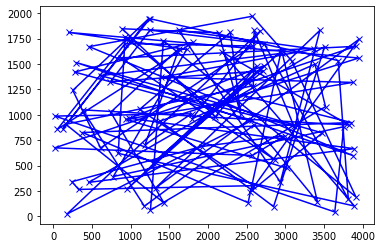

In [2]:
with open("data/tsp_100_1") as f:
    input_data = f.read()
    
lines = input_data.split('\n')

nodeCount = int(lines[0])

points = []
for i in range(1, nodeCount+1):
    line = lines[i]
    parts = line.split()
    points.append(Point(float(parts[0]), float(parts[1])))

plt.plot([point.x for point in points], [point.y for point in points], 'xb-')

counter = 1000
counter = 1000
counter = 2000
counter = 1000
counter = 2000
counter = 1000
counter = 2000
counter = 3000
counter = 4000
counter = 5000
counter = 6000
counter = 7000
counter = 1000
counter = 2000
counter = 3000
counter = 4000
counter = 5000
counter = 6000
counter = 7000
counter = 8000
counter = 9000
[34, 31, 44, 62, 25, 82, 86, 54, 1, 27, 45, 88, 79, 97, 49, 90, 20, 63, 52, 92, 95, 78, 83, 32, 4, 56, 58, 6, 69, 61, 76, 35, 84, 11, 9, 26, 72, 47, 40, 94, 81, 60, 64, 66, 8, 23, 70, 85, 48, 87, 73, 67, 28, 2, 37, 65, 43, 71, 19, 15, 75, 14, 53, 68, 24, 46, 5, 29, 80, 38, 91, 57, 41, 50, 12, 55, 98, 39, 59, 33, 21, 96, 42, 77, 16, 7, 10, 0, 36, 74, 30, 18, 13, 89, 3, 51, 93, 99, 22, 17]


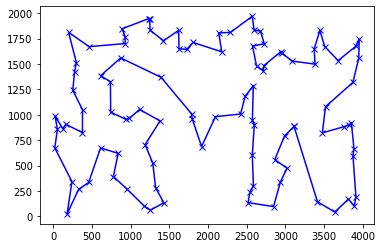

In [3]:
best_path, distance_best_path, best_distances = solve(points)
print(best_path)
plt.plot([points[i].x for i in best_path] + [points[best_path[0]].x], [points[i].y for i in best_path] + [points[best_path[0]].y], 'xb-')

counter = 1000
counter = 2000
counter = 3000
counter = 4000
counter = 5000
counter = 6000
counter = 7000
counter = 8000
counter = 9000
[25, 83, 32, 4, 45, 27, 1, 2, 28, 16, 77, 42, 7, 0, 36, 58, 56, 6, 69, 61, 76, 35, 84, 94, 40, 47, 72, 51, 93, 99, 22, 18, 19, 71, 43, 65, 37, 13, 89, 3, 33, 59, 39, 48, 85, 87, 73, 67, 66, 64, 60, 81, 96, 57, 41, 50, 12, 55, 98, 97, 49, 20, 90, 63, 78, 95, 52, 92, 21, 70, 23, 8, 34, 17, 79, 88, 86, 54, 24, 68, 53, 14, 15, 75, 46, 5, 91, 38, 80, 29, 30, 74, 10, 11, 9, 26, 31, 44, 62, 82]


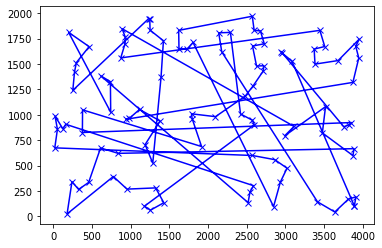

In [3]:
best_path, distance_best_path, best_distances = solve(points)
print(best_path)
plt.plot([points[i].x for i in best_path] + [points[best_path[0]].x], [points[i].y for i in best_path] + [points[best_path[0]].y], 'xb-')

[83, 92, 52, 95, 78, 49, 97, 20, 90, 63, 27, 45, 1, 54, 86, 25, 82, 62, 44, 31, 13, 89, 3, 17, 34, 38, 91, 57, 41, 6, 56, 58, 69, 18, 22, 99, 93, 51, 8, 23, 70, 21, 66, 64, 60, 81, 96, 28, 2, 33, 59, 39, 98, 55, 12, 50, 16, 77, 42, 7, 10, 74, 30, 0, 36, 61, 76, 35, 84, 48, 85, 87, 73, 67, 43, 37, 65, 71, 19, 24, 68, 15, 14, 75, 53, 46, 5, 29, 80, 11, 9, 26, 72, 47, 40, 94, 79, 88, 4, 32]


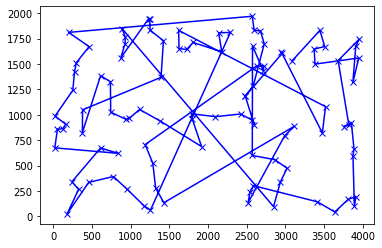

In [3]:
best_path, distance_best_path, best_distances = solve(points)
print(best_path)
plt.plot([points[i].x for i in best_path] + [points[0].x], [points[i].y for i in best_path] + [points[0].y], 'xb-')

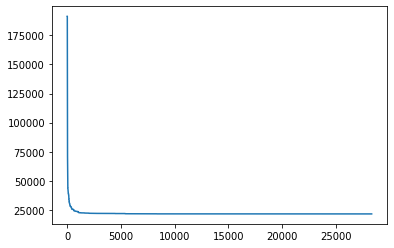

In [4]:
plt.plot([i for i in range(len(best_distances))], best_distances)

In [8]:
a = set([3,2,1])
a | {4}
a

{1, 2, 3}

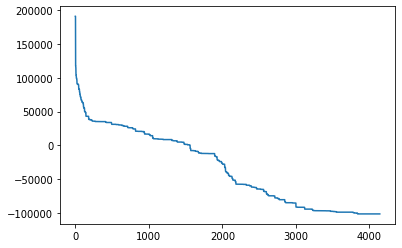

In [4]:
plt.plot([i for i in range(len(best_distances))], best_distances)

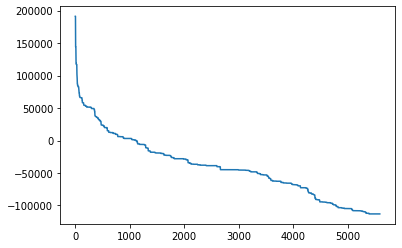

In [5]:
plt.plot([i for i in range(len(best_distances))], best_distances)

In [6]:
best_distances[-1]

19449.039769567436

In [4]:
best_distances[-1]

-112997.20499792784